In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import pandas as pd
import numpy as np
%aimport Variant_analysis_helper_functions

import subprocess
from scipy.stats import chisquare
import os
import protfasta
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
d_domains = "../outputs/mutations/domains_gnomad_snv_classified/"
files = os.listdir(d_domains)
ENST_codes = [f.replace(".bed", "") for f in files]

uniprotID_ENST_mapping = pd.read_csv("../../data/SFARI_TFs_with_ENST.csv")
uniprotID_ENST_mapping = uniprotID_ENST_mapping[["uniprotID", "ENST"]]
uniprotID_ENST_mapping["ENST"] = uniprotID_ENST_mapping["ENST"].str.split(".").str[0]
uniprotID_ENST_mapping_dict= dict(zip(uniprotID_ENST_mapping["ENST"], uniprotID_ENST_mapping["uniprotID"]))
uniprotID_ENST_mapping_dict['ENST00000434704'] = 'O60479'

SFARI_TFs = pd.read_csv("../../data/SFARI_TFs_with_ENST.csv")

In [10]:
output = Variant_analysis_helper_functions.generate_df(ENST_codes, uniprotID_ENST_mapping_dict, 0, 1, domain_types = ["AD", "DBD"], print_output = False, variant_filename = "gnomad")

NameError: name 'rare_output' is not defined

In [12]:
output = pd.merge(SFARI_TFs[["gene-symbol", "uniprotID"]], output)
output.sort_values(by = "uniprotID")

,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop
17,MEIS2,O14770,1434,463,0.322873,414,186,0.449275,189,17,0.089947
14,KLF7,O75840,909,242,0.266227,300,88,0.293333,0,0,NaN
4,CAMTA2,O94983,3609,1457,0.403713,882,365,0.413832,378,94,0.248677
27,NKX2-2,O95096,822,421,0.512165,162,86,0.530864,180,52,0.288889
41,THRA,P10827,1473,538,0.365241,156,42,0.269231,225,58,0.257778
9,ERG,P11308,1461,475,0.325120,573,191,0.333333,243,30,0.123457
43,VDR,P11473,1284,483,0.376168,171,45,0.263158,228,106,0.464912
37,TCF4,P15884,2004,557,0.277944,483,118,0.244306,0,0,NaN
40,TFE3,P19532,1728,403,0.233218,1059,272,0.256846,0,0,NaN
25,NR1D1,P20393,1845,758,0.410840,834,291,0.348921,231,62,0.268398


In [19]:
output_with_AD_DBD = output[output["DBD_cds_length"] > 0]
output_with_AD_DBD = output_with_AD_DBD.reset_index(drop = True)
output_with_AD_DBD

,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop,ADvsDBD_fisher_exact_p_vals
0,ARX,Q96QS3,1689,413,0.244523,273,59,0.216117,180,13,0.072222,3.614125e-05
1,CAMTA2,O94983,3609,1457,0.403713,882,365,0.413832,378,94,0.248677,1.676983e-08
2,ESR2,Q92731,1593,765,0.480226,1035,481,0.464734,198,83,0.419192,2.439906e-01
3,ERG,P11308,1461,475,0.325120,573,191,0.333333,243,30,0.123457,1.206945e-10
4,KMT2A,Q03164,11910,3579,0.300504,420,143,0.340476,36,13,0.361111,8.552759e-01
5,MEF2C,Q06413,1422,298,0.209564,1161,279,0.240310,87,5,0.057471,1.599882e-05
6,MEIS2,O14770,1434,463,0.322873,414,186,0.449275,189,17,0.089947,2.738004e-20
7,MSX2,P35548,804,371,0.461443,102,37,0.362745,180,58,0.322222,5.137438e-01
8,NFIA,Q12857,1530,433,0.283007,249,82,0.329317,582,149,0.256014,3.459163e-02
9,NFIX,Q14938,1509,331,0.219351,267,65,0.243446,582,108,0.185567,5.446506e-02


In [20]:
len(output_with_AD_DBD)

24

In [21]:
# Performing Fisher's exact test
Variant_analysis_helper_functions.add_fisher_p_vals_vs_control(output_with_AD_DBD, "AD", "DBD")

In [22]:
output_with_AD_DBD

,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop,ADvsDBD_fisher_exact_p_vals
0,ARX,Q96QS3,1689,413,0.244523,273,59,0.216117,180,13,0.072222,3.614125e-05
1,CAMTA2,O94983,3609,1457,0.403713,882,365,0.413832,378,94,0.248677,1.676983e-08
2,ESR2,Q92731,1593,765,0.480226,1035,481,0.464734,198,83,0.419192,2.439906e-01
3,ERG,P11308,1461,475,0.325120,573,191,0.333333,243,30,0.123457,1.206945e-10
4,KMT2A,Q03164,11910,3579,0.300504,420,143,0.340476,36,13,0.361111,8.552759e-01
5,MEF2C,Q06413,1422,298,0.209564,1161,279,0.240310,87,5,0.057471,1.599882e-05
6,MEIS2,O14770,1434,463,0.322873,414,186,0.449275,189,17,0.089947,2.738004e-20
7,MSX2,P35548,804,371,0.461443,102,37,0.362745,180,58,0.322222,5.137438e-01
8,NFIA,Q12857,1530,433,0.283007,249,82,0.329317,582,149,0.256014,3.459163e-02
9,NFIX,Q14938,1509,331,0.219351,267,65,0.243446,582,108,0.185567,5.446506e-02


In [24]:
Variant_analysis_helper_functions.return_bh_sig(output_with_AD_DBD, "ADvsDBD_fisher_exact_p_vals", 0.1)

,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop,ADvsDBD_fisher_exact_p_vals
0,ARX,Q96QS3,1689,413,0.244523,273,59,0.216117,180,13,0.072222,3.614125e-05
1,CAMTA2,O94983,3609,1457,0.403713,882,365,0.413832,378,94,0.248677,1.676983e-08
3,ERG,P11308,1461,475,0.325120,573,191,0.333333,243,30,0.123457,1.206945e-10
5,MEF2C,Q06413,1422,298,0.209564,1161,279,0.240310,87,5,0.057471,1.599882e-05
6,MEIS2,O14770,1434,463,0.322873,414,186,0.449275,189,17,0.089947,2.738004e-20
8,NFIA,Q12857,1530,433,0.283007,249,82,0.329317,582,149,0.256014,3.459163e-02
9,NFIX,Q14938,1509,331,0.219351,267,65,0.243446,582,108,0.185567,5.446506e-02
10,NR1D1,P20393,1845,758,0.410840,834,291,0.348921,231,62,0.268398,2.205719e-02
11,NR4A2,P43354,1797,656,0.365053,318,90,0.283019,228,26,0.114035,1.432351e-06
12,NKX2-2,O95096,822,421,0.512165,162,86,0.530864,180,52,0.288889,5.807880e-06


Text(0.5, 1.0, 'All gnomAD variants')

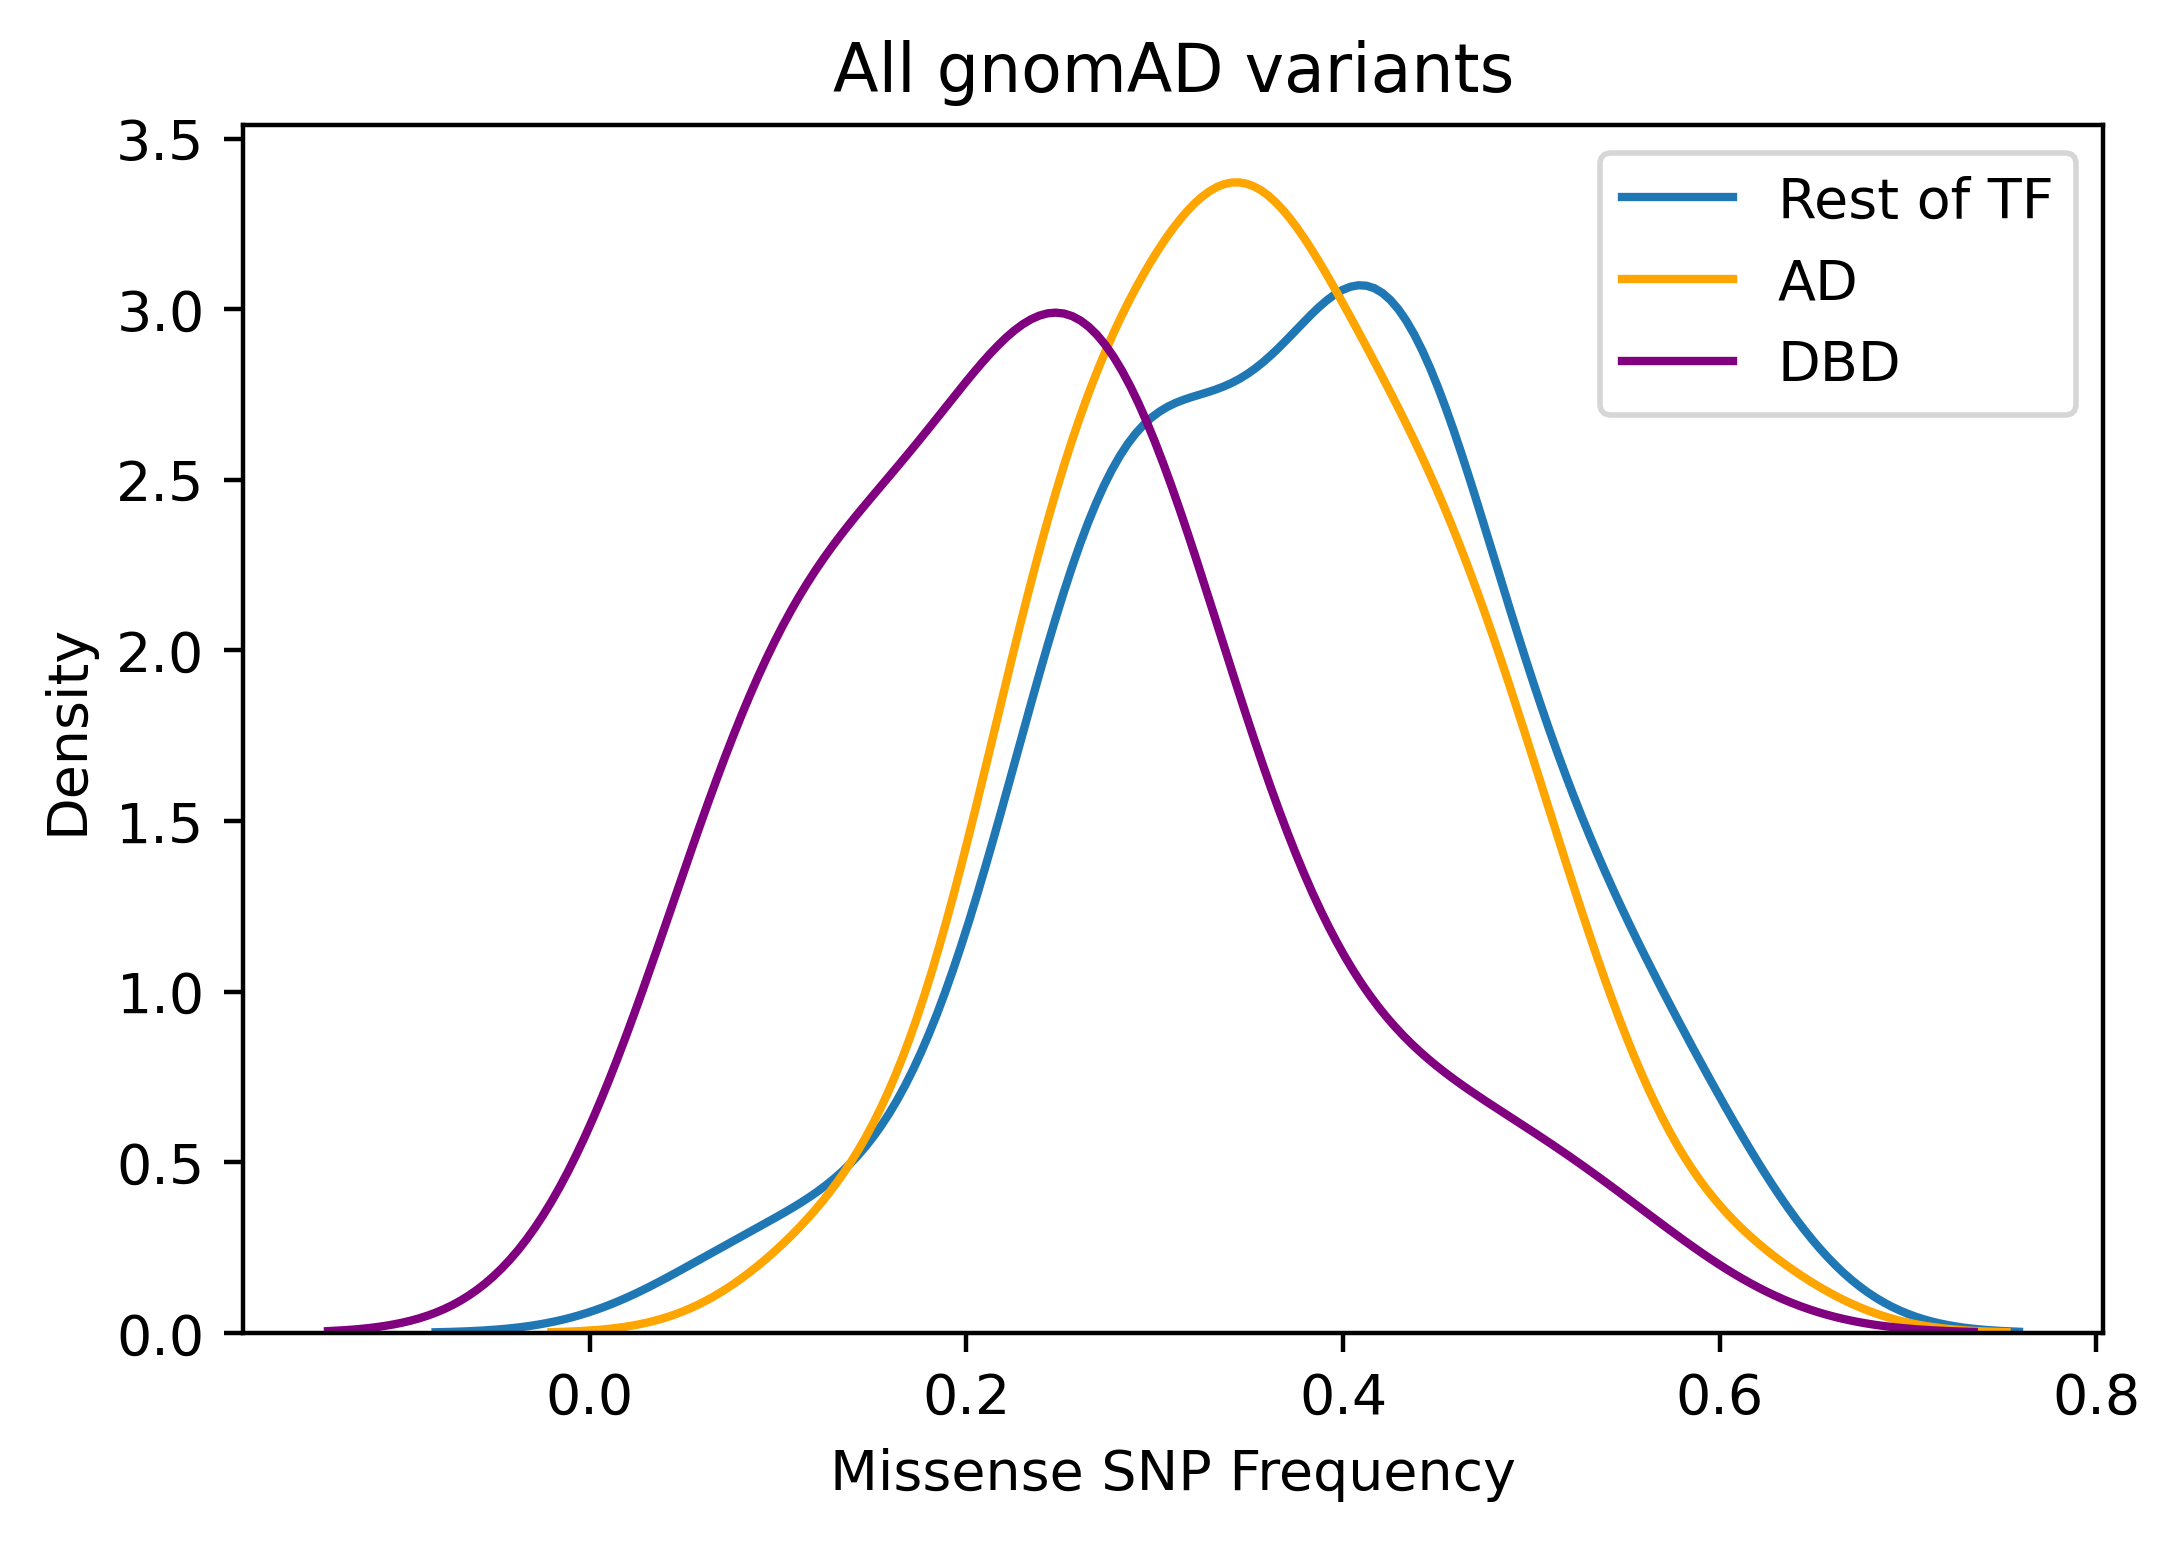

In [33]:
plt.figure(figsize=(6,4), dpi = 400)


rest_of_TF_num = (output["TF_missense"] - output["AD_missense"] - output["DBD_missense"]) 
rest_of_TF_denom = output["TF_cds_length"] - output["AD_cds_length"] - output["DBD_cds_length"]


sns.kdeplot(rest_of_TF_num / rest_of_TF_denom, label = "Rest of TF");
sns.kdeplot(output["AD_missense_prop"], color = "orange", label = "AD");
sns.kdeplot(output["DBD_missense_prop"], color = "purple", label = "DBD");


plt.legend()
plt.xlabel("Missense SNP Frequency")
plt.title("All gnomAD variants")